In [9]:
import uproot
import matplotlib.pyplot
import numpy as np
import h5py

In [13]:
filename = "/home/andrea//PG4-build/AD1_IBD_DetSim.h5"
with h5py.File(filename, "r") as f:    
    data = np.array(f['PhysPulse'][:])

In [37]:
data

array([(10000, 131, 1.3819361 , 0.99974173, 1.27879523e+09, -7.313812 , [254.54237 , 682.0595  ], 446.7767 , 0.14544222, 1),
       (10000, 131, 0.53829783, 0.16290988, 1.27880206e+09, -7.1233134, [103.10113 , 253.22646 ], 415.6269 , 0.25872284, 6),
       (10001, 110, 0.10296696, 0.2826178 , 1.53018968e+09, -6.234887 , [ 19.484034,  42.622375], 365.1946 , 0.16309169, 1),
       ...,
       (19999,  30, 0.11112665, 0.89940226, 1.42815855e+14, -1.1492125, [ 31.624146,  36.46539 ],  64.4979 , 0.1711287 , 1),
       (19999,  31, 0.04506421, 0.23972969, 1.42815855e+14, -2.5017633, [ 11.418966,  16.865778], 145.85689, 0.14345634, 1),
       (19999,  15, 0.53888124, 0.81981534, 1.42815855e+14, -5.615771 , [113.563126, 228.66008 ], 327.85593, 0.26308125, 6)],
      dtype={'names':['evt','seg','E','rand','t','dt','PE','y','PSD','PID'], 'formats':['<i8','<i4','<f4','<f4','<f8','<f4',('<f4', (2,)),'<f4','<f4','<i4'], 'offsets':[0,8,12,16,24,32,36,44,48,56], 'itemsize':64})

In [30]:
data[2]

(10001, 110, 0.10296696, 0.2826178, 1.53018968e+09, -6.234887, [19.484034, 42.622375], 365.1946, 0.16309169, 1)

In [31]:
data[3]

(10001, 109, 0.72967243, 0.9472011, 1.53018968e+09, -4.855179, [149.957  , 284.79675], 286.11075, 0.14286476, 1)

In [35]:
data[4]

(10001, 123, 1.3308387, 0.23165654, 1.53018968e+09, -8.951313, [211.19029, 679.37585], 541.9681, 0.14414993, 1)

In [2]:
signal = uproot.open("/home/andrea/PROSPECT_ML/data/MC_1.root")

In [63]:
signal["Tibd"].keys()

[b'evt',
 b't_abs',
 b'Encapt',
 b'E',
 b'Esmear',
 b'maxseg',
 b'xyz',
 b'E_maxseg',
 b'E_adjacent',
 b'ncapt_psd',
 b'prompt_psd',
 b'segmult',
 b'diameter',
 b'tspread',
 b'ncapt_dt',
 b'n_seg',
 b'n_xyz',
 b'veto_t',
 b'detgeom',
 b'rxpwr',
 b'dr']

In [64]:
signal_data = {}

In [83]:
signal_data['Encapt'] = list(signal["Tibd"].array("Encapt"))
signal_data['t_abs'] = list(signal["Tibd"].array("t_abs"))
signal_data['E'] = list(signal["Tibd"].array("E"))
signal_data['Esmear'] = list(signal["Tibd"].array("Esmear"))
signal_data['maxseg'] = list(signal["Tibd"].array("maxseg"))
signal_data['ncapt_dt'] = list(signal["Tibd"].array("ncapt_dt"))
signal_data['dr'] = list(signal["Tibd"].array("dr"))
signal_data['xyz'] = list(signal["Tibd"].array("xyz"))
signal_data['n_xyz'] = list(signal["Tibd"].array("n_xyz"))
signal_data['ncapt_psd'] = list(signal["Tibd"].array("ncapt_psd"))

In [66]:
bckg = uproot.open("/home/andrea/PROSPECT_ML/data/RxOff.root")

In [67]:
bckg_data = {}

In [84]:
bckg_data['Encapt'] = list(bckg["Tibd"].array("Encapt"))
bckg_data['t_abs'] = list(bckg["Tibd"].array("t_abs"))
bckg_data['E'] = list(bckg["Tibd"].array("E"))
bckg_data['Esmear'] = list(bckg["Tibd"].array("Esmear"))
bckg_data['maxseg'] = list(bckg["Tibd"].array("maxseg"))
bckg_data['ncapt_dt'] = list(bckg["Tibd"].array("ncapt_dt"))
bckg_data['dr'] = list(bckg["Tibd"].array("dr"))
bckg_data['xyz'] = list(bckg["Tibd"].array("xyz"))
bckg_data['n_xyz'] = list(bckg["Tibd"].array("n_xyz"))
bckg_data['ncapt_psd'] = list(bckg["Tibd"].array("ncapt_psd"))

In [86]:
bckg_data['xyz'][0]

array([795.85   , 578.8    ,  83.64907], dtype=float32)

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import math

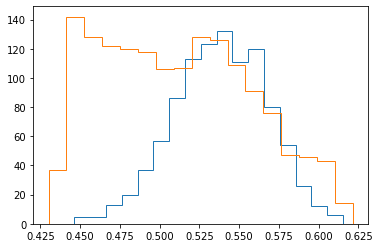

In [70]:
#ax = plt.hist(signal_data['Encapt'])
w = 0.01
n = math.ceil((max(signal_data['Encapt']) - min(signal_data['Encapt']))/w)
ax = plt.hist(signal_data['Encapt'], bins = n, fill=False, histtype='step')
ax2 = plt.hist(bckg_data['Encapt'], bins = n, fill = False, histtype='step')

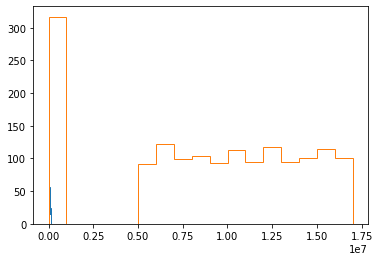

In [71]:
ax = plt.hist(signal_data['ncapt_dt'], bins = n, fill=False, histtype='step')
ax2 = plt.hist(bckg_data['ncapt_dt'], bins = n, fill = False, histtype='step')

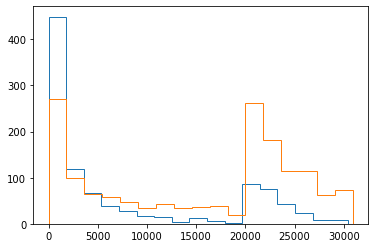

In [72]:
ax = plt.hist(signal_data['dr'], bins = n, fill=False, histtype='step')
ax2 = plt.hist(bckg_data['dr'], bins = n, fill = False, histtype='step')

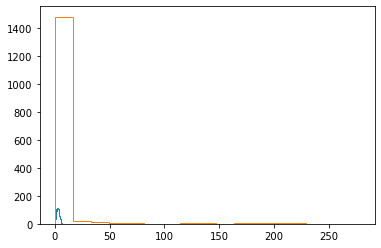

In [73]:
ax = plt.hist(signal_data['E'], bins = n, fill=False, histtype='step')
ax2 = plt.hist(bckg_data['E'], bins = n, fill = False, histtype='step')

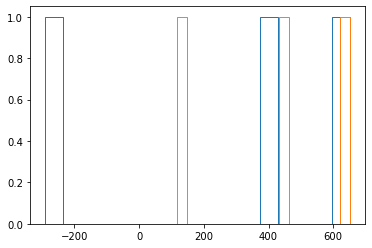

In [79]:
ax = plt.hist(signal_data['xyz'][2], bins = n, fill=False, histtype='step')
ax2 = plt.hist(bckg_data['xyz'][2], bins = n, fill = False, histtype='step')

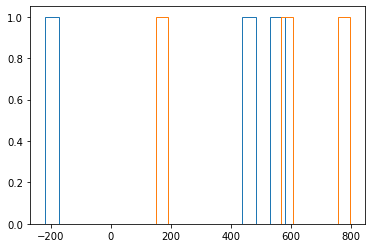

In [82]:
ax = plt.hist(signal_data['n_xyz'][0], bins = n, fill=False, histtype='step')
ax2 = plt.hist(bckg_data['n_xyz'][0], bins = n, fill = False, histtype='step')

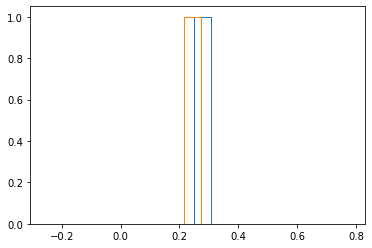

In [85]:
ax = plt.hist(signal_data['ncapt_psd'][0], bins = n, fill=False, histtype='step')
ax2 = plt.hist(bckg_data['ncapt_psd'][0], bins = n, fill = False, histtype='step')